In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('conposcovidloc.csv')

In [3]:
df.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Case_AcquisitionInfo,Outcome1,Outbreak_Related,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,2020-09-24,2020-09-28,2020-09-28,2020-09-25,80s,FEMALE,OB,Not Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
1,2,2020-09-22,2020-09-25,2020-09-25,2020-09-23,50s,NaN,OB,Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2020-08-15,2020-08-18,2020-08-18,2020-08-15,50s,FEMALE,OB,Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
3,4,2020-08-30,2020-09-07,2020-09-07,2020-09-03,20s,FEMALE,OB,Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2020-09-19,2020-09-20,2020-09-20,2020-09-19,<20,FEMALE,OB,Resolved,Yes,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239


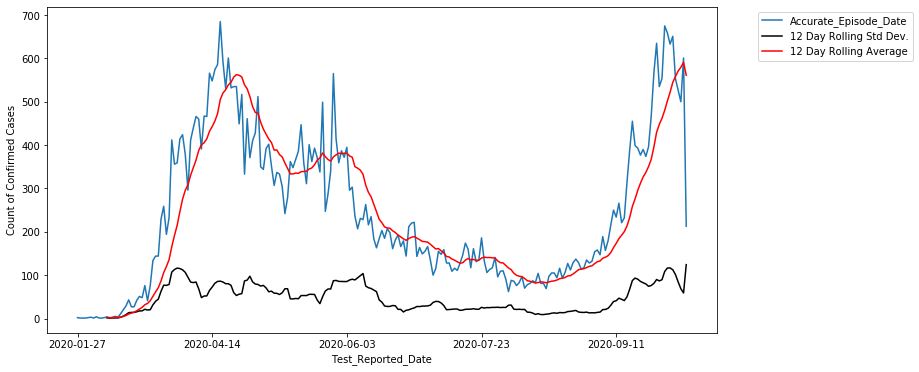

In [46]:
dff = df.groupby(['Test_Reported_Date'])['Accurate_Episode_Date'].count()
dff.plot(figsize=(12,6))
dff_mean = dff.rolling(window=12).mean()
dff_std = dff.rolling(window=12).std()
plt.plot(dff_std, color='black',label='12 Day Rolling Std Dev.')
plt.plot(dff_mean,color='red',label='12 Day Rolling Average')
plt.legend(loc = 'upper right', bbox_to_anchor=(1.30,1))
plt.ylabel('Count of Confirmed Cases')
plt.show()

In [51]:
cvd = pd.read_csv('covidtesting.csv')
cvd.head()

,Reported Date,Confirmed Negative,Presumptive Negative,Presumptive Positive,Confirmed Positive,Resolved,Deaths,Total Cases,Total patients approved for testing as of Reporting Date,Total tests completed in the last day,Under Investigation,Number of patients hospitalized with COVID-19,Number of patients in ICU with COVID-19,Number of patients in ICU on a ventilator with COVID-19,Total Positive LTC Resident Cases,Total Positive LTC HCW Cases,Total LTC Resident Deaths,Total LTC HCW Deaths
0,2020-01-26,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-27,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-28,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-30,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-31,NaN,NaN,0.0,2.0,NaN,NaN,2.0,NaN,NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
cvd.set_index(['Reported Date'],inplace = True)

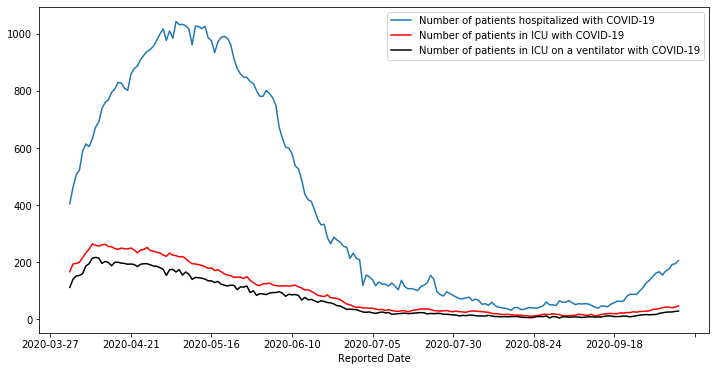

In [70]:
cvd['Number of patients hospitalized with COVID-19'].plot(figsize=(12,6),label = 'Number of patients hospitalized with COVID-19')
cvd['Number of patients in ICU with COVID-19'].plot(color='red', label = 'Number of patients in ICU with COVID-19')
cvd['Number of patients in ICU on a ventilator with COVID-19'].plot(color='black',label='Number of patients in ICU on a ventilator with COVID-19')
plt.legend()
plt.show()

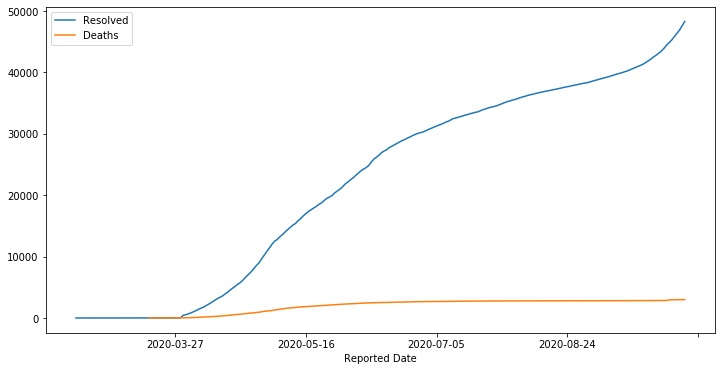

In [76]:
cvd['Resolved'].plot(label='Resolved',figsize=(12,6))
cvd['Deaths'].plot(label='Deaths')
plt.legend()
plt.show()